# 🧠 Desafio de Classificação: Identificação de Estrelas de Nêutrons Pulsares com Regressão Logística

Neste desafio, você atuará como um cientista de dados com a missão de identificar **estrelas de nêutrons pulsares reais** a partir de observações astronômicas captadas por radiotelescópios.

---

## 📊 Sobre o Dataset

O dataset contém **dados simulados** obtidos de medições realizadas por meio do telescópio **HTRU (High Time Resolution Universe Survey)**. Cada amostra representa uma observação de um objeto estelar, descrita por **oito atributos estatísticos extraídos de sinais de rádio**, como:

---

## 🧾 Descrição dos Atributos

O dataset é composto por **17.898 observações**, cada uma representando medições estatísticas de sinais obtidos por radiotelescópios. Abaixo estão os oito atributos disponíveis:

1. **Mean of the integrated profile**  
   Média do perfil integrado do sinal, que representa a média da intensidade do sinal ao longo do tempo.

2. **Standard deviation of the integrated profile**  
   Desvio padrão do perfil integrado, indicando a variação da intensidade em torno da média.

3. **Excess kurtosis of the integrated profile**  
   Curtose excessiva do perfil integrado, que mede a "cauda" da distribuição do sinal em relação a uma distribuição normal.

4. **Skewness of the integrated profile**  
   Assimetria do perfil integrado, representando o grau de distorção da distribuição do sinal em torno da média.

5. **Mean of the DM-SNR curve**  
   Média da curva DM-SNR (medida da razão sinal-ruído em função da dispersão), que quantifica a intensidade média do sinal ajustada por diferentes dispersões.

6. **Standard deviation of the DM-SNR curve**  
   Desvio padrão da curva DM-SNR, indicando a variabilidade da razão sinal-ruído em diferentes dispersões.

7. **Excess kurtosis of the DM-SNR curve**  
   Curtose excessiva da curva DM-SNR, avaliando a presença de picos extremos na distribuição da razão sinal-ruído.

8. **Skewness of the DM-SNR curve**  
   Assimetria da curva DM-SNR, que mostra a inclinação da distribuição da razão sinal-ruído em relação à média.

9. **target_class**  
   Classe alvo binária que indica o tipo de objeto:
   - `1`: Pulsares reais (estrelas de nêutrons altamente magnetizadas)  
   - `0`: Não-pulsares (ruído ou outras fontes astrofísicas)

---

## 🎯 Objetivo

Seu objetivo é treinar um modelo de **regressão logística** que seja capaz de classificar corretamente as observações como **pulsares ou não-pulsares**, utilizando apenas os atributos fornecidos.

In [11]:
# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#from pingouin import ttest
import matplotlib.pyplot as plt

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

In [2]:
df_pulsar = pd.read_csv('datasets/pulsar.csv')

In [3]:
df_pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df_pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
df_pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


### EDA

In [6]:
# Como está a distribuição da variálve target - Percentual
px.bar(df_pulsar.value_counts('target_class') / len(df_pulsar))

Temos um dataset muito desbalanceado, isso poderá complicar a classificação correta das classes

In [7]:
# Selecionando as colunas de atributos (excluindo a target)
colunas = [col for col in df_pulsar.columns if col != 'target_class']
metade = len(colunas) // 2    

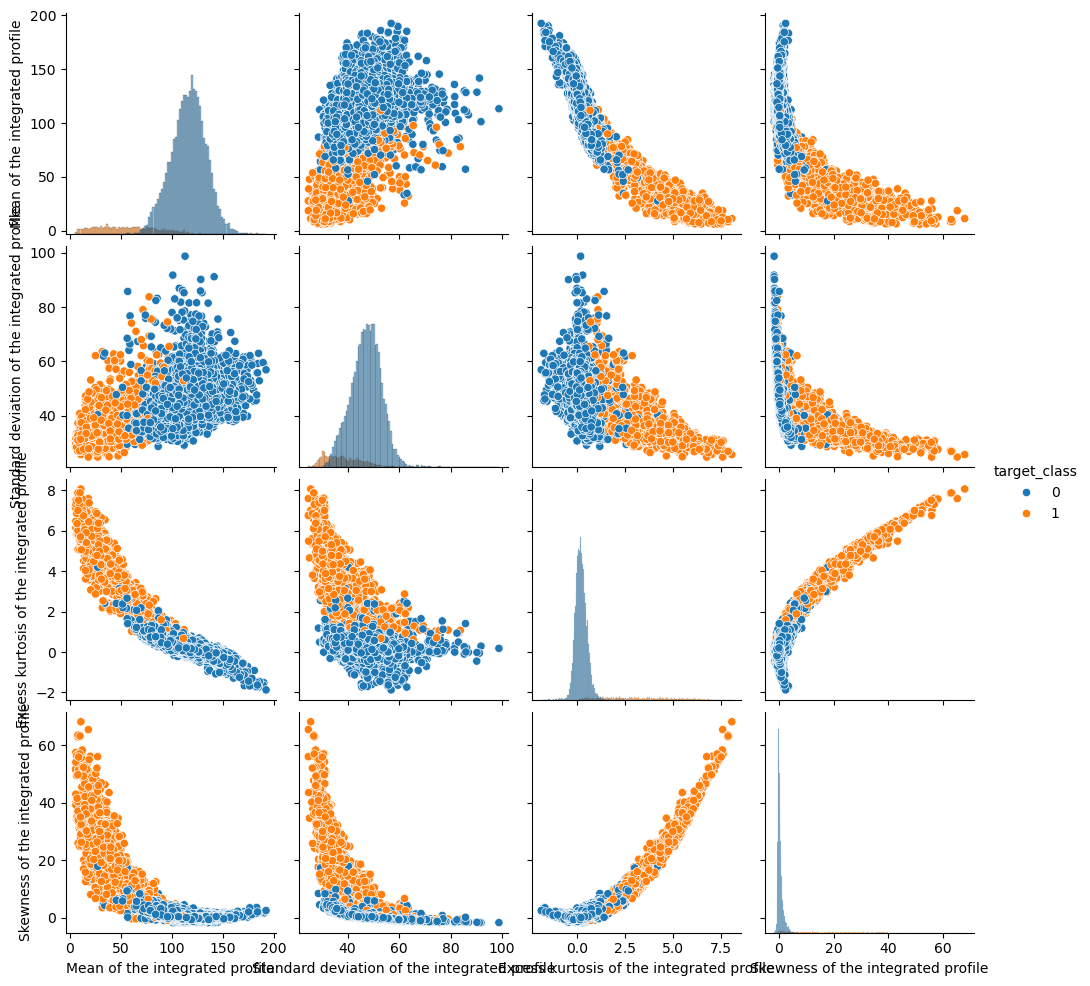

In [8]:
# Primeiro grupo de colunas
colunas_1 = colunas[:metade] + ['target_class']
sns.pairplot(df_pulsar[colunas_1], hue='target_class', diag_kind='hist')

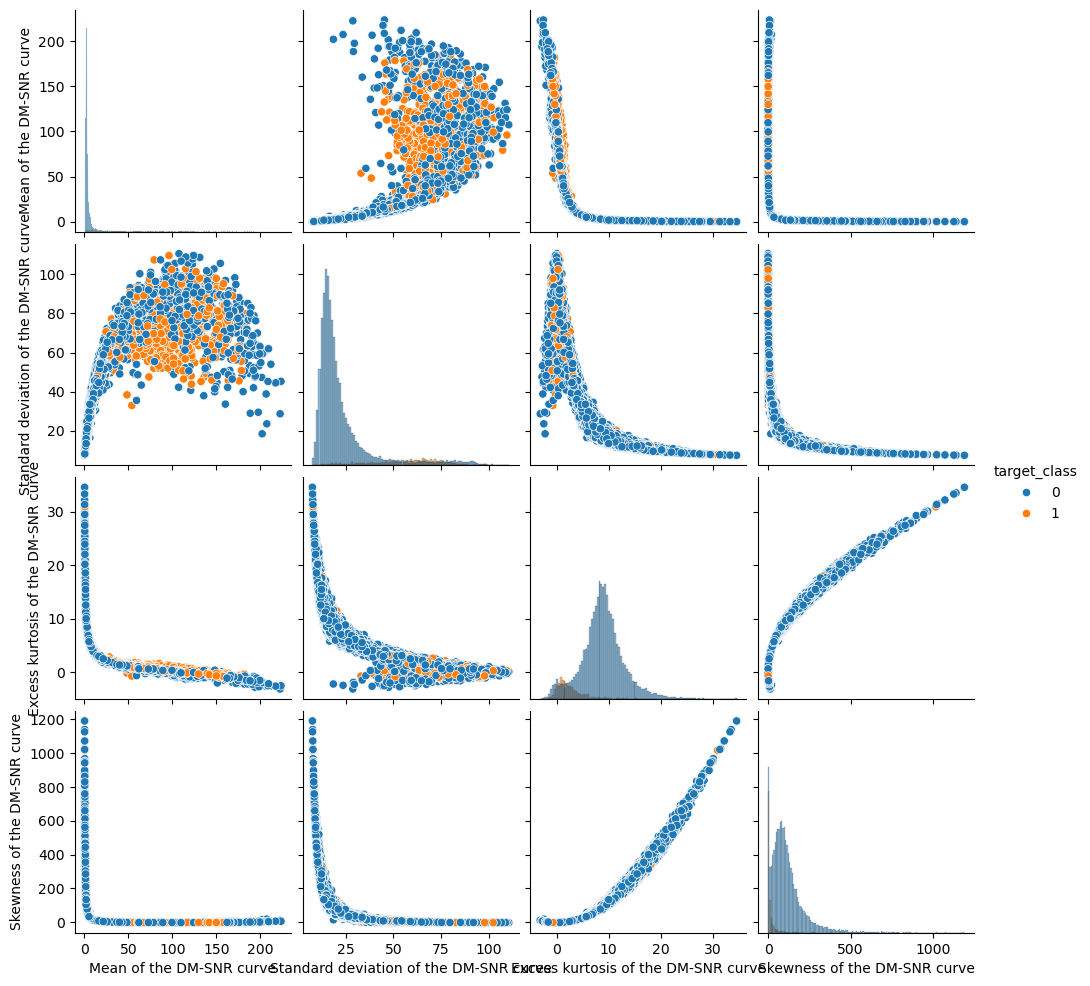

In [12]:
colunas_2 = colunas[metade:] + ['target_class']
sns.pairplot(df_pulsar[colunas_2], hue='target_class', diag_kind='hist')

In [13]:
df_pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [14]:
# Boxplot target_class x Mean of the integrated profile
px.box(df_pulsar, x='target_class', y='Mean of the integrated profile', color='target_class', title='Boxplot target_class x Mean of the integrated profile')

In [15]:
# Boxplot target_class x Standard deviation of the integrated profile
px.box(df_pulsar, x='target_class', y='Standard deviation of the integrated profile', color='target_class', title='Boxplot target_class x Standard deviation of the integrated profile')

In [16]:
# Boxplot target_class x Excess kurtosis of the integrated profile
px.box(df_pulsar, x='target_class', y='Excess kurtosis of the integrated profile', color='target_class', title='Boxplot target_class x Excess kurtosis of the integrated profile')

In [17]:
# Boxplot target_class x Mean of the DM-SNR curve
px.box(df_pulsar, x='target_class', y='Mean of the DM-SNR curve', color='target_class', title='Boxplot target_class x Mean of the DM-SNR curve')

In [18]:
# Boxplot target_class x Standard deviation of the DM-SNR curve
px.box(df_pulsar, x='target_class', y='Standard deviation of the DM-SNR curve', color='target_class', title='Boxplot target_class x Standard deviation of the DM-SNR curve')

In [19]:
# Boxplot target_class x Standard deviation of the DM-SNR curve
px.box(df_pulsar, x='target_class', y='Excess kurtosis of the DM-SNR curve', color='target_class', title='Boxplot target_class x Excess kurtosis of the DM-SNR curve')

In [20]:
# Boxplot target_class x Skewness of the integrated profile
px.box(df_pulsar, x='target_class', y='Skewness of the integrated profile', color='target_class', title='Boxplot target_class x Skewness of the integrated profile')

In [21]:
# Boxplot target_class x Skewness of the DM-SNR curve
px.box(df_pulsar, x='target_class', y='Skewness of the DM-SNR curve', color='target_class', title='Boxplot target_class x Skewness of the DM-SNR curve')

In [22]:
# Teste t de Student para todas as colunas em relação à target_class
resultados_ttest = []
columns = [column for column in df_pulsar.columns if column != 'target_class']

for column in columns:
    grupo_1 = df_pulsar[df_pulsar['target_class'] == 1][column]
    grupo_0 = df_pulsar[df_pulsar['target_class'] == 0][column]
    resultado = ttest(x=grupo_1, y=grupo_0, paired=False)
    resultados_ttest.append({
        'coluna': column,
        'p-valor': resultado['p-val'].values[0],
        'estatística': resultado['T'].values[0],
        'significativo': resultado['p-val'].values[0] < 0.05,
    })

# Exibir os resultados em um DataFrame para melhor visualização
pd.DataFrame(resultados_ttest)

NameError: name 'ttest' is not defined

Devido a características do dataset e do problemas todas as features deram com diferença relevante

In [23]:
## Coor Matrix
corr_matrix = df_pulsar.corr()
corr_matrix
# Plot Heatmap
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x=corr_matrix.columns,
        y=corr_matrix.index,
        z=np.array(corr_matrix),
        text=corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1,
    )
)
fig.show()

C:\Users\guilh\AppData\Local\Temp\ipykernel_32788\3229134035.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




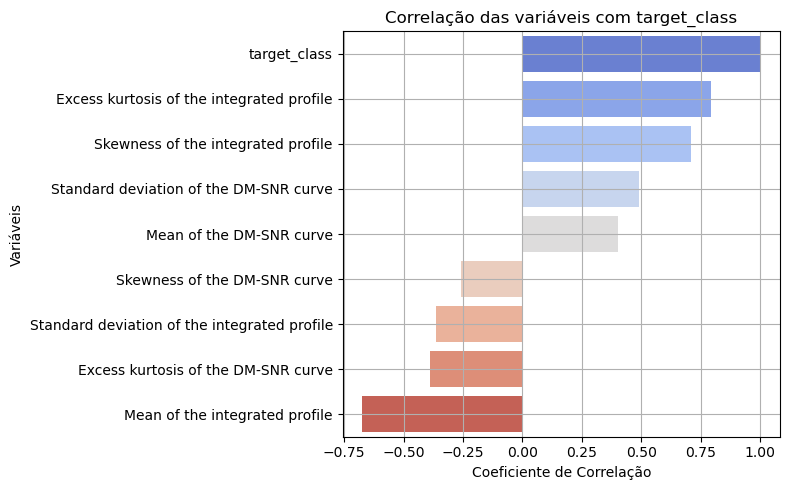

In [24]:
correlation_with_target = df_pulsar.corr()['target_class'].sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlação das variáveis com target_class')
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.grid(True)
plt.tight_layout()
plt.show()

### Treinar Modelo Baseline

In [25]:
X = df_pulsar.drop(columns=['target_class'], axis=1)
y = df_pulsar['target_class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, stratify=y)

In [27]:
model_lr = LogisticRegression(solver='liblinear')

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear'))
])

In [29]:
# Defina o KFold
kf = KFold(n_splits=5, shuffle=True, random_state=51)

# Calcule a precisão média usando validação cruzada
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='precision')

In [30]:
print(f'Precisão média (KFold=5): {scores.mean():.4f}')
print(f'Precisão em cada fold: {scores}')

Precisão média (KFold=5): 0.9411
Precisão em cada fold: [0.94482759 0.96140351 0.94809689 0.94736842 0.90357143]


In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [32]:
y_decision = pipeline.decision_function(X_test)

In [33]:
# Retornar os valores da curva ROC - TPR (True Positive Rate) e FPR (False Positive Rate), Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_decision)

In [34]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9636358863588638

In [35]:
fig = px.area(
    x=fpr,
    y=tpr,
    title=f'Curva ROC (AUC={roc_auc:.4f})',
    labels={'x': 'FPR', 'y': 'TPR'},
    width=700,
    height=500,
)
fig.add_shape(
    type='line',
    line=dict(color='red', dash='dash'),
    x0=0, y0=0,
    x1=1, y1=1,
)
fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [36]:
# Apresentar a importância das Features (co base nos coeficientes obitidos na regressão)
model = pipeline.named_steps['logreg']
importance = np.abs(model.coef_[0])
feature_names = X.columns
print("Importancia das Features")
for name, imp in zip(feature_names, importance):
    print(f"{name}: {imp}")

Importancia das Features
Mean of the integrated profile: 0.4624547465210869
Standard deviation of the integrated profile: 0.21964161565688528
Excess kurtosis of the integrated profile: 5.9924524961041925
Skewness of the integrated profile: 3.0576950627414443
Mean of the DM-SNR curve: 0.7180595937084191
Standard deviation of the DM-SNR curve: 0.7820483118614469
Excess kurtosis of the DM-SNR curve: 0.23604810424614342
Skewness of the DM-SNR curve: 0.3489014122279094


In [37]:
# Obtenha as probabilidades previstas para a classe 1
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Teste thresholds de 0.1 até 0.9
thresholds = np.arange(0.1, 0.91, 0.05)
resultados = []
for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    resultados.append({'threshold': threshold, 'precision': precision, 'recall': recall, 'f1_score': f1})

In [38]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,threshold,precision,recall,f1_score
0,0.10,0.786096,0.896341,0.837607
1,0.15,0.854291,0.869919,0.862034
2,0.20,0.886316,0.855691,0.870734
3,0.25,0.904139,0.843496,0.872766
4,0.30,0.917960,0.841463,0.878049
5,0.35,0.927438,0.831301,0.876742
6,0.40,0.933486,0.827236,0.877155
7,0.45,0.937209,0.819106,0.874187
8,0.50,0.941176,0.813008,0.872410
9,0.55,0.944976,0.802846,0.868132


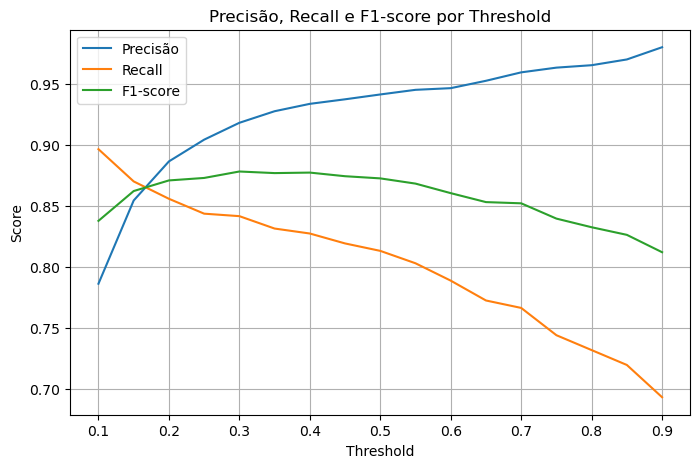

In [39]:
# Opcional: plotar precisão e recall por threshold
plt.figure(figsize=(8,5))
plt.plot(df_resultados['threshold'], df_resultados['precision'], label='Precisão')
plt.plot(df_resultados['threshold'], df_resultados['recall'], label='Recall')
plt.plot(df_resultados['threshold'], df_resultados['f1_score'], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precisão, Recall e F1-score por Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Seleciona o threshold com maior f1_score
best_idx = df_resultados['f1_score'].idxmax()
best_threshold = df_resultados.loc[best_idx, 'threshold']
print(f"Threshold com maior precisão: {best_threshold}")

Threshold com maior precisão: 0.30000000000000004


In [41]:
# Faz as previsões com esse threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

In [42]:
# Retornar a classificação predita com base no conjunto de teste
y_pred = pipeline.predict(X_test)

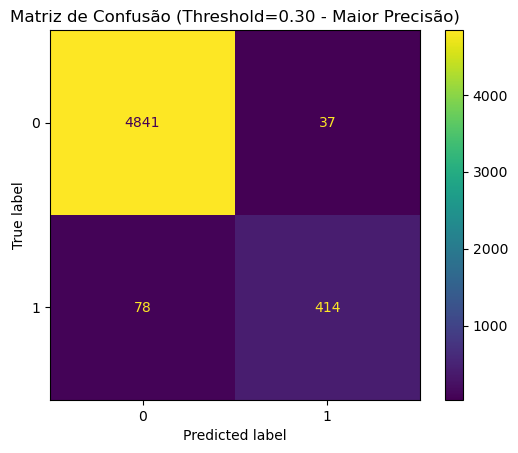

In [43]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(cm, display_labels=pipeline.named_steps['logreg'].classes_)
disp.plot()
plt.title(f'Matriz de Confusão (Threshold={best_threshold:.2f} - Maior Precisão)')
plt.show()

# 🧾 Conclusão Final do Projeto

A matriz de confusão apresentada, utilizando o threshold que maximiza a precisão, mostra o seguinte desempenho do modelo de Regressão Logística:

- **Verdadeiros Negativos (TN):** 4841  
- **Falsos Positivos (FP):** 37  
- **Falsos Negativos (FN):** 78  
- **Verdadeiros Positivos (TP):** 414  

---

## 📊 Análise:

- O modelo apresenta uma **alta precisão** na identificação de pulsares reais, reduzindo o número de falsos positivos (apenas 37 casos).
- O número de verdadeiros positivos (414) é superior ao de falsos negativos (78), indicando boa sensibilidade, embora ainda existam alguns casos de pulsares reais não identificados.
- A quantidade de verdadeiros negativos (4841) mostra que o modelo é eficiente em descartar corretamente objetos que não são pulsares.

---

## ✅ Resumo dos resultados:

- **Alta precisão:** O modelo é confiável para identificar pulsares reais, com baixo risco de alarmes falsos.  
- **Recall razoável:** Ainda há espaço para melhorar a detecção de todos os pulsares reais, caso o objetivo seja minimizar falsos negativos.  
- **Balanceamento:** O threshold escolhido favorece a precisão, sendo ideal para cenários onde é mais importante evitar falsos positivos do que capturar todos os verdadeiros positivos.

---

## 🧠 Conclusão:

O modelo de regressão logística, aliado ao ajuste de threshold, mostrou-se eficiente para o desafio proposto, sendo capaz de identificar pulsares reais com alta precisão e bom equilíbrio entre os tipos de erro.